In [ ]:
%pip install catboost==1.2
%pip install xgboost

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore")

In [148]:
equal_df_news = pd.read_csv('equal_news_all_features.csv')
equal_df_essay = pd.read_csv('equal_essay_all_features.csv')
equal_df_blogs = pd.read_csv('equal_blogs_all_features.csv')

In [149]:
different_df_news = pd.read_csv('different_news_all_features.csv')
different_df_essay = pd.read_csv('different_essay_all_features.csv')
different_df_blogs = pd.read_csv('different_blogs_all_features.csv')

In [151]:
equal_df = pd.concat([equal_df_news, equal_df_essay, equal_df_blogs])
different_df = pd.concat([different_df_news, different_df_essay, different_df_blogs])

## **Normalization**

In [158]:
equal_df.drop(['text', 'lemmatized_text', 'syntax_markup', 'morph_markup', 'n_words'], axis=1, inplace=True)
equal_df.reset_index(drop=True, inplace=True)

In [159]:
different_df.drop(['text', 'lemmatized_text', 'syntax_markup', 'morph_markup', 'n_words'], axis=1, inplace=True)
different_df.reset_index(drop=True, inplace=True)

In [161]:
class_equal = equal_df['class']
class_different = different_df['class']

In [162]:
equal_df.drop(['class'], axis=1, inplace=True)
equal_df.reset_index(drop=True, inplace=True)

In [163]:
different_df.drop(['class'], axis=1, inplace=True)
different_df.reset_index(drop=True, inplace=True)

In [165]:
X_train_equal, X_test_equal, y_train_equal, y_test_equal = train_test_split(equal_df, class_equal, test_size = 0.2, shuffle=True, stratify=class_equal)
X_train_equal, X_val_equal, y_train_equal, y_val_equal = train_test_split(X_train_equal, y_train_equal, test_size = 0.25, shuffle=True, stratify=y_train_equal)

In [166]:
X_train_different, X_test_different, y_train_different, y_test_different = train_test_split(different_df, class_different, test_size = 0.2, shuffle=True, stratify=class_different)
X_train_different, X_val_different, y_train_different, y_val_different = train_test_split(X_train_different, y_train_different, test_size = 0.25, shuffle=True, stratify=y_train_different)

In [168]:
X_train_equal.reset_index(inplace=True, drop=True)
X_test_equal.reset_index(inplace=True, drop=True)
X_val_equal.reset_index(inplace=True, drop=True)

y_train_equal.reset_index(inplace=True, drop=True)
y_test_equal.reset_index(inplace=True, drop=True)
y_val_equal.reset_index(inplace=True, drop=True)

In [169]:
X_train_different.reset_index(inplace=True, drop=True)
X_test_different.reset_index(inplace=True, drop=True)
X_val_different.reset_index(inplace=True, drop=True)

y_train_different.reset_index(inplace=True, drop=True)
y_test_different.reset_index(inplace=True, drop=True)
y_val_different.reset_index(inplace=True, drop=True)

In [170]:
scaler_train_equal = StandardScaler()
scaler_test_equal = StandardScaler()
scaler_val_equal = StandardScaler()

scaler_train_different = StandardScaler()
scaler_test_different = StandardScaler()
scaler_val_different = StandardScaler()

In [171]:
X_train_equal_scaled = pd.DataFrame(scaler_train_equal.fit_transform(X_train_equal), columns=X_train_equal.columns)
X_val_equal_scaled = pd.DataFrame(scaler_val_equal.fit_transform(X_val_equal), columns=X_val_equal.columns)
X_test_equal_scaled = pd.DataFrame(scaler_test_equal.fit_transform(X_test_equal), columns=X_test_equal.columns)

In [172]:
X_train_different_scaled = pd.DataFrame(scaler_train_different.fit_transform(X_train_different), columns=X_train_different.columns)
X_val_different_scaled = pd.DataFrame(scaler_val_different.fit_transform(X_val_different), columns=X_val_different.columns)
X_test_different_scaled = pd.DataFrame(scaler_test_different.fit_transform(X_test_different), columns=X_test_different.columns)

## **Models**

### **RandomForestClassifier: equal themes sample**

In [175]:
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [176]:
rf_equal = RandomForestClassifier(random_state=42)

grid_search_equal = GridSearchCV(estimator=rf_equal, param_grid=param_grid_rf, cv=5, scoring='f1_macro')
grid_search_equal.fit(X_val_equal_scaled, y_val_equal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1_macro')

In [177]:
best_params_equal = grid_search_equal.best_params_
best_score_equal = grid_search_equal.best_score_

print(f'These are the best parameters: {best_params_equal}')
print(f'This is the best score: {best_score_equal}')

These are the best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
This is the best score: 0.9347657811601822


In [178]:
best_equal_rf = RandomForestClassifier(**best_params_equal, random_state=42)
best_equal_rf.fit(X_train_equal_scaled, y_train_equal)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)

In [179]:
y_pred_equal = best_equal_rf.predict(X_test_equal_scaled)
print("Classification Report:")
print(classification_report(y_test_equal, y_pred_equal))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       816
           1       0.95      0.93      0.94       977

    accuracy                           0.93      1793
   macro avg       0.93      0.93      0.93      1793
weighted avg       0.93      0.93      0.93      1793



### **RandomForestClassifier: different themes sample**

In [185]:
rf_different = RandomForestClassifier(random_state=42)

grid_search_different = GridSearchCV(estimator=rf_different, param_grid=param_grid_rf, cv=5, scoring='f1_macro')
grid_search_different.fit(X_val_different_scaled, y_val_different)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1_macro')

In [186]:
best_params_different = grid_search_different.best_params_
best_score_different = grid_search_different.best_score_

print(f'These are the best parameters: {best_params_different}')
print(f'This is the best score: {best_score_different}')

These are the best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
This is the best score: 0.9323862928870763


In [188]:
best_different_rf = RandomForestClassifier(**grid_search_different.best_params_, random_state=42)
best_different_rf.fit(X_train_different_scaled, y_train_different)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [189]:
y_pred_different = best_different_rf.predict(X_test_different_scaled)
print("Classification Report:")
print(classification_report(y_test_different, y_pred_different))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       664
           1       0.92      0.95      0.94       832

    accuracy                           0.93      1496
   macro avg       0.93      0.93      0.93      1496
weighted avg       0.93      0.93      0.93      1496



### **CatBoostClassifier: equal themes sample**

In [227]:
catboost_params = {'depth': [4, 6, 8, 10],
                   'learning_rate': [0.01, 0.05, 0.1], 
                   }

In [228]:
catboost_model_equal = CatBoostClassifier(verbose=False)

catboost_grid_equal = GridSearchCV(catboost_model_equal, catboost_params, cv=3, scoring='f1_macro')
catboost_grid_equal.fit(X_val_equal_scaled, y_val_equal)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x2ddd4cdd0>,
             param_grid={'depth': [4, 6, 8, 10],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='f1_macro')

In [230]:
best_catboost_params_equal = catboost_grid_equal.best_params_
best_catboost_score_equal = catboost_grid_equal.best_score_

print(f'These are the best parameters: {best_catboost_params_equal}')
print(f'This is the best score: {best_catboost_score_equal}')

These are the best parameters: {'depth': 8, 'learning_rate': 0.05}
This is the best score: 0.9448752559562982


In [231]:
catboost_model_equal.set_params(**best_catboost_params_equal)
catboost_model_equal.fit(X_train_equal_scaled, y_train_equal)
catboost_pred_equal = catboost_model_equal.predict(X_test_equal_scaled)

print(classification_report(y_test_equal, catboost_pred_equal))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       816
           1       0.96      0.96      0.96       977

    accuracy                           0.96      1793
   macro avg       0.96      0.96      0.96      1793
weighted avg       0.96      0.96      0.96      1793



### **CatBoostClassifier: different themes sample**

In [236]:
catboost_model_different = CatBoostClassifier(verbose=False)

catboost_grid_different = GridSearchCV(catboost_model_different, catboost_params, cv=3, scoring='f1_macro')
catboost_grid_different.fit(X_val_different_scaled, y_val_different)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x308043590>,
             param_grid={'depth': [4, 6, 8, 10],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='f1_macro')

In [237]:
best_catboost_params_different = catboost_grid_different.best_params_
best_catboost_score_different = catboost_grid_different.best_score_

print(f'These are the best parameters: {best_catboost_params_different}')
print(f'This is the best score: {best_catboost_score_different}')

These are the best parameters: {'depth': 4, 'learning_rate': 0.1}
This is the best score: 0.9457105012468885


In [238]:
catboost_model_different.set_params(**best_catboost_params_different)
catboost_model_different.fit(X_train_different_scaled, y_train_different)
catboost_pred_different = catboost_model_different.predict(X_test_different_scaled)

print(classification_report(y_test_different, catboost_pred_different))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       664
           1       0.96      0.97      0.96       832

    accuracy                           0.96      1496
   macro avg       0.96      0.96      0.96      1496
weighted avg       0.96      0.96      0.96      1496



### **XGBoostClassifier: equal themes sample**

In [247]:
xgboost_params = {'max_depth': [4, 6, 8],
                  'learning_rate': [0.01, 0.05, 0.1]}

In [248]:
xgboost_model_equal = XGBClassifier()

xgboost_grid_equal = GridSearchCV(xgboost_model_equal, xgboost_params, cv=3)
xgboost_grid_equal.fit(X_val_equal_scaled, y_val_equal)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8]})

In [249]:
best_xgboost_params_equal = xgboost_grid_equal.best_params_
best_xgboost_score_equal = xgboost_grid_equal.best_score_

print(f'These are the best parameters: {best_xgboost_params_equal}')
print(f'This is the best score: {best_xgboost_score_equal}')

These are the best parameters: {'learning_rate': 0.1, 'max_depth': 8}
This is the best score: 0.9386144770676124


In [250]:
xgboost_model_equal.set_params(**best_xgboost_params_equal)
xgboost_model_equal.fit(X_train_equal_scaled, y_train_equal)
xgboost_pred_equal = xgboost_model_equal.predict(X_test_equal_scaled)

print(classification_report(y_test_equal, xgboost_pred_equal))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       816
           1       0.96      0.96      0.96       977

    accuracy                           0.95      1793
   macro avg       0.95      0.95      0.95      1793
weighted avg       0.95      0.95      0.95      1793



### **XGBoostClassifier: different themes sample**

In [256]:
xgboost_model_different = XGBClassifier()

xgboost_grid_different = GridSearchCV(xgboost_model_different, xgboost_params, cv=3)
xgboost_grid_different.fit(X_val_different_scaled, y_val_different)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'alpha': [0, 0.5, 1], 'gamma': [0, 0.1, 0.3],
                         'lambda': [1, 1.5, 2]})

In [257]:
print(f'These are the best parameters: {xgboost_grid_different.best_params_}')
print(f'This is the best score: {xgboost_grid_different.best_score_}')

These are the best parameters: {'alpha': 0, 'gamma': 0.1, 'lambda': 1.5}
This is the best score: 0.9445262680649117


In [258]:
xgboost_model_different.set_params(**xgboost_grid_different.best_params_)
xgboost_model_different.fit(X_train_different_scaled, y_train_different)
xgboost_pred_different = xgboost_model_different.predict(X_test_different_scaled)

print(classification_report(y_test_different, xgboost_pred_different))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       664
           1       0.96      0.96      0.96       832

    accuracy                           0.96      1496
   macro avg       0.95      0.96      0.96      1496
weighted avg       0.96      0.96      0.96      1496



## **Feature importance RandomForestClassifier model**

In [ ]:
columns_correspondence = {
    'n_letters': 'количество букв', 
    'n_syllables': "количество слогов",
    'n_words_per_sentence': "количество слов в предложении",
    'n_simple_words': "количество простых слов", 
    'n_simple_words_per_sentence': "количество простых слов в предложении", 
    'n_monosyllable_words': "количество односложных слов",
    'n_monosyllable_words_per_sentence': "количество односложных слов в предложении", 
    'n_polysyllable_words': "количество многосложных слов",
    'n_polysyllable_words_per_sentence': "количество многосложных слов в предложении", 
    'n_long_words': "количество длинных слов",
    'n_long_words_per_sentence': "количество длинных слов в предложении", 
    'n_complex_words': "количество сложных слов",
    'n_complex_words_per_sentence': "количество сложных слов в предложении", 
    'n_unique_words_per_sentence': "количество уникальных слов в предложении", 
    'n_sents': "количество предложений", 
    'n_punctuations': "количество знаков препинания",
    'n_punctuations_per_sentence': "количество знаков препинания в предложении", 
    'flesch_kincaid_grade': "индекс Флеша-Кинкейда",
    'flesch_reading_easy': "индекс удобочитаемости Флеша", 
    'mtld': "MTLD",
    'hdd': "HD-D",
    'number_of_unique_words': "количество уникальных слов", 
    'number_of_top_list_words': "количество наиболее частотных лемм",
    'number_of_stop_words': "количество стоп-слов", 
    'number_of_unique_stop_words': "количество уникальных стоп-слов", 
    'unique_ner': "количество уникальных именованных сущностей", 
    'number_of_ner_per_text': "количество именованных сущностей в тексте",
    'mean_ner_per_sentence': "среднее количество именованных сущностей в предложении", 
    'number_nouns': "количество существительных", 
    'number_verbs': "количество глаголов", 
    'number_adj': "количество прилагательных",
    'number_pronouns': "количество местоимений", 
    'number_nums': "количество числительных", 
    'number_of_func_words': "количество служебных слов", 
    'rouge_1': "ROUGE-1",
    'rouge_2': "ROUGE-2", 
    'rouge_l': "ROUGE-L", 
    'parallel_structures_level': "степень сходства синтаксической структуры", 
    'morph_rouge_1': "POS ROUGE-1",
    'morph_rouge_2': "POS ROUGE-2", 
    'morph_rouge_l': "POS ROUGE-L", 
    'num_coref_clusters': "количество кореферентных цепочек", 
    'mean_cluster_length': "средняя длина кореферентных цепочек"
    }

In [ ]:
feature_importances_equal_rf = best_equal_rf.feature_importances_
feature_names_equal_rf = list(columns_correspondence.values())
combined_equal_rf = zip(feature_names_equal_rf, feature_importances_equal_rf)
sorted_combined_equal_rf = sorted(combined_equal_rf, key=lambda x: -x[1])
sorted_feature_names_equal_rf, sorted_feature_importances_equal_rf = zip(*sorted_combined_equal_rf)

feature_importances_different_rf = best_different_rf.feature_importances_
feature_names_different_rf = list(columns_correspondence.values())
combined = zip(feature_names_equal_rf, feature_importances_equal_rf)
sorted_combined_different = sorted(combined, key=lambda x: -x[1])
sorted_feature_names_different_rf, sorted_feature_importances_different_rf = zip(*sorted_combined_different)

In [ ]:
feature_importances_different_rf = best_different_rf.feature_importances_
feature_names_different_rf = list(columns_correspondence.values())
combined_different_rf = zip(feature_names_different_rf, feature_importances_different_rf)
sorted_combined_different_rf = sorted(combined_different_rf, key=lambda x: -x[1])
sorted_feature_names_different_rf, sorted_feature_importances_different_rf = zip(*sorted_combined_different_rf)
top_10_feature_names_different_rf = sorted_feature_names_different_rf[:15]
top_10_feature_importances_different_rf = sorted_feature_importances_different_rf[:15]

feature_importances_equal_rf = best_equal_rf.feature_importances_
feature_names_equal_rf = list(columns_correspondence.values())
combined_equal_rf = zip(feature_names_equal_rf, feature_importances_equal_rf)
sorted_combined_equal_rf = sorted(combined_equal_rf, key=lambda x: -x[1])
sorted_feature_names_equal_rf, sorted_feature_importances_equal_rf = zip(*sorted_combined_equal_rf)
top_10_feature_names_equal_rf = sorted_feature_names_equal_rf[:15]
top_10_feature_importances_equal_rf = sorted_feature_importances_equal_rf[:15]

In [ ]:
feature_importances_different_rf = best_different_rf.feature_importances_
feature_names_different_rf = list(columns_correspondence.values())
combined_different_rf = zip(feature_names_different_rf, feature_importances_different_rf)
sorted_combined_different_rf = sorted(combined_different_rf, key=lambda x: -x[1])
sorted_feature_names_different_rf, sorted_feature_importances_different_rf= zip(*sorted_combined_different_rf)
top_10_least_important_feature_names_different_rf = sorted_feature_names_different_rf[-15:]
top_10_least_important_feature_importances_different_rf = sorted_feature_importances_different_rf[-15:]

feature_importances_equal_rf = best_equal_rf.feature_importances_
feature_names_equal_rf = list(columns_correspondence.values())
combined_equal_rf = zip(feature_names_equal_rf, feature_importances_equal_rf)
sorted_combined_equal_rf = sorted(combined_equal_rf, key=lambda x: -x[1])
sorted_feature_names_equal_rf, sorted_feature_importances_equal_rf = zip(*sorted_combined_equal_rf)
top_10_least_important_feature_names_equal_rf= sorted_feature_names_equal_rf[-15:]
top_10_least_important_feature_importances_equal_rf = sorted_feature_importances_equal_rf[-15:]

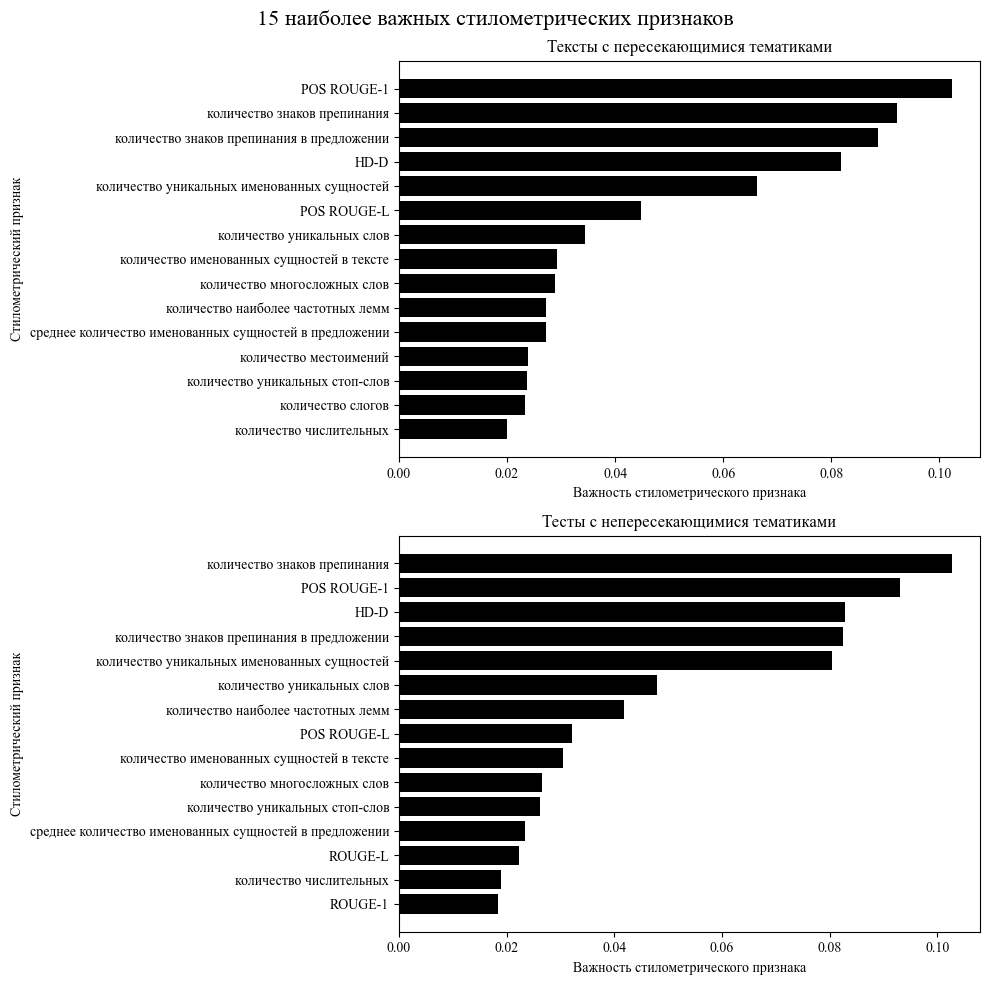

In [196]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.barh(top_10_feature_names_equal_rf, top_10_feature_importances_equal_rf, color='black')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Тексты с пересекающимися тематиками')
plt.gca().invert_yaxis()

plt.subplot(2, 1, 2)
plt.barh(top_10_feature_names_different_rf, top_10_feature_importances_different_rf, color='black')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Тесты с непересекающимися тематиками')
plt.gca().invert_yaxis()

plt.suptitle('15 наиболее важных стилометрических признаков', fontsize=16)
plt.tight_layout()
plt.show()

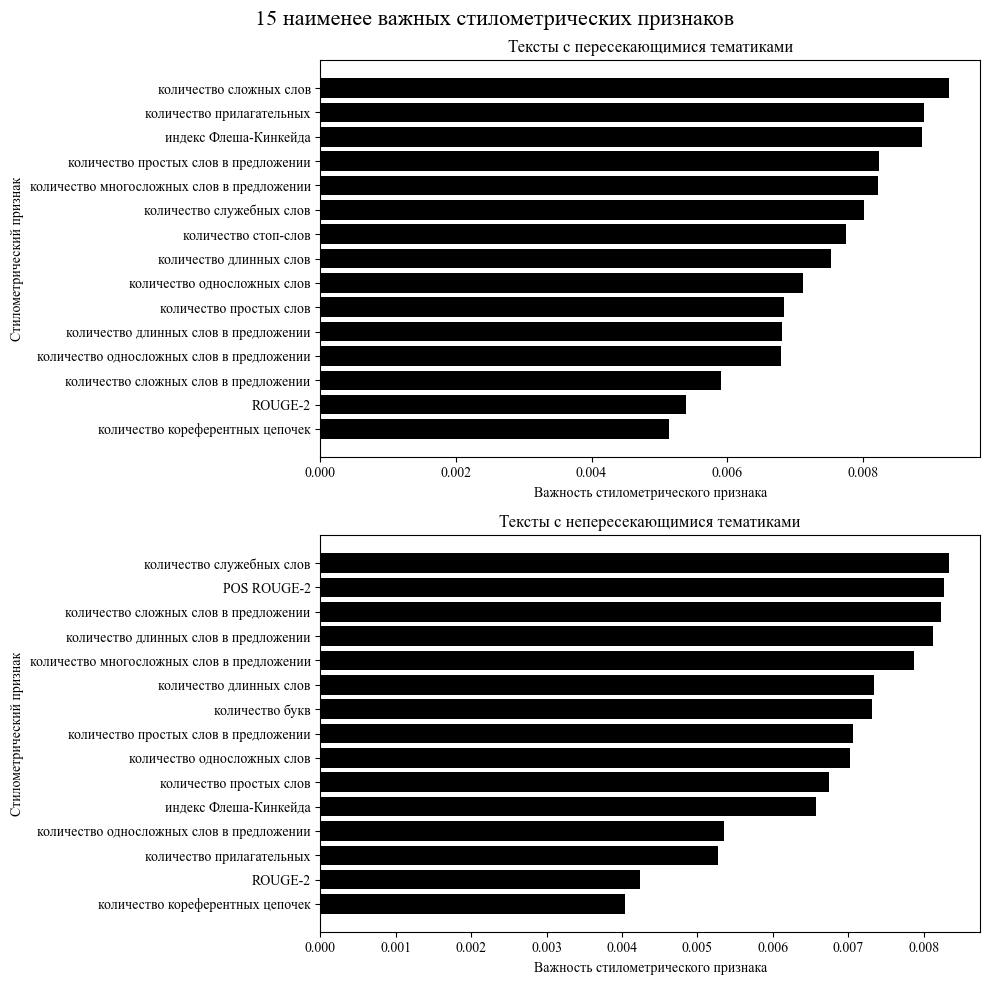

In [519]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.barh(top_10_least_important_feature_names_equal_rf, top_10_least_important_feature_importances_equal_rf, color='black')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Тексты с пересекающимися тематиками')
plt.gca().invert_yaxis()

plt.subplot(2, 1, 2)
plt.barh(top_10_least_important_feature_names_different_rf, top_10_least_important_feature_importances_different_rf, color='black')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Тексты с непересекающимися тематиками')
plt.gca().invert_yaxis()

plt.suptitle('15 наименее важных стилометрических признаков', fontsize=16)
plt.tight_layout()
plt.show()